## Epsilon Analysis

#### Scenario :
- 5 eps_start values x 5 eps_end values = 25 combinations
- 7 seeds x 25 combinations = 175 unique runs

### Importing Dependencies

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Importing Grid Run Results

In [99]:
df=pd.read_csv('results.csv')

### Numerical Pre-processing

In [100]:
df['seed'] = df['seed'].astype(int)
df['mean_reward'] = df['mean_reward'].astype(float).round(2)
df['std_reward'] = df['std_reward'].astype(float).round(2)
df.head()

,eps_start,eps_end,mean_reward,std_reward,seed
0,1.0,0.30,98.73,4.21,670487
1,1.0,0.10,180.29,20.95,670487
2,1.0,0.20,99.90,3.78,670487
3,1.0,0.05,101.25,3.88,670487
4,1.0,0.01,106.11,58.49,670487


### Plots per eps combination

- 7 seed runs distuingished by color
- x axis : variance and y axis : mean reward

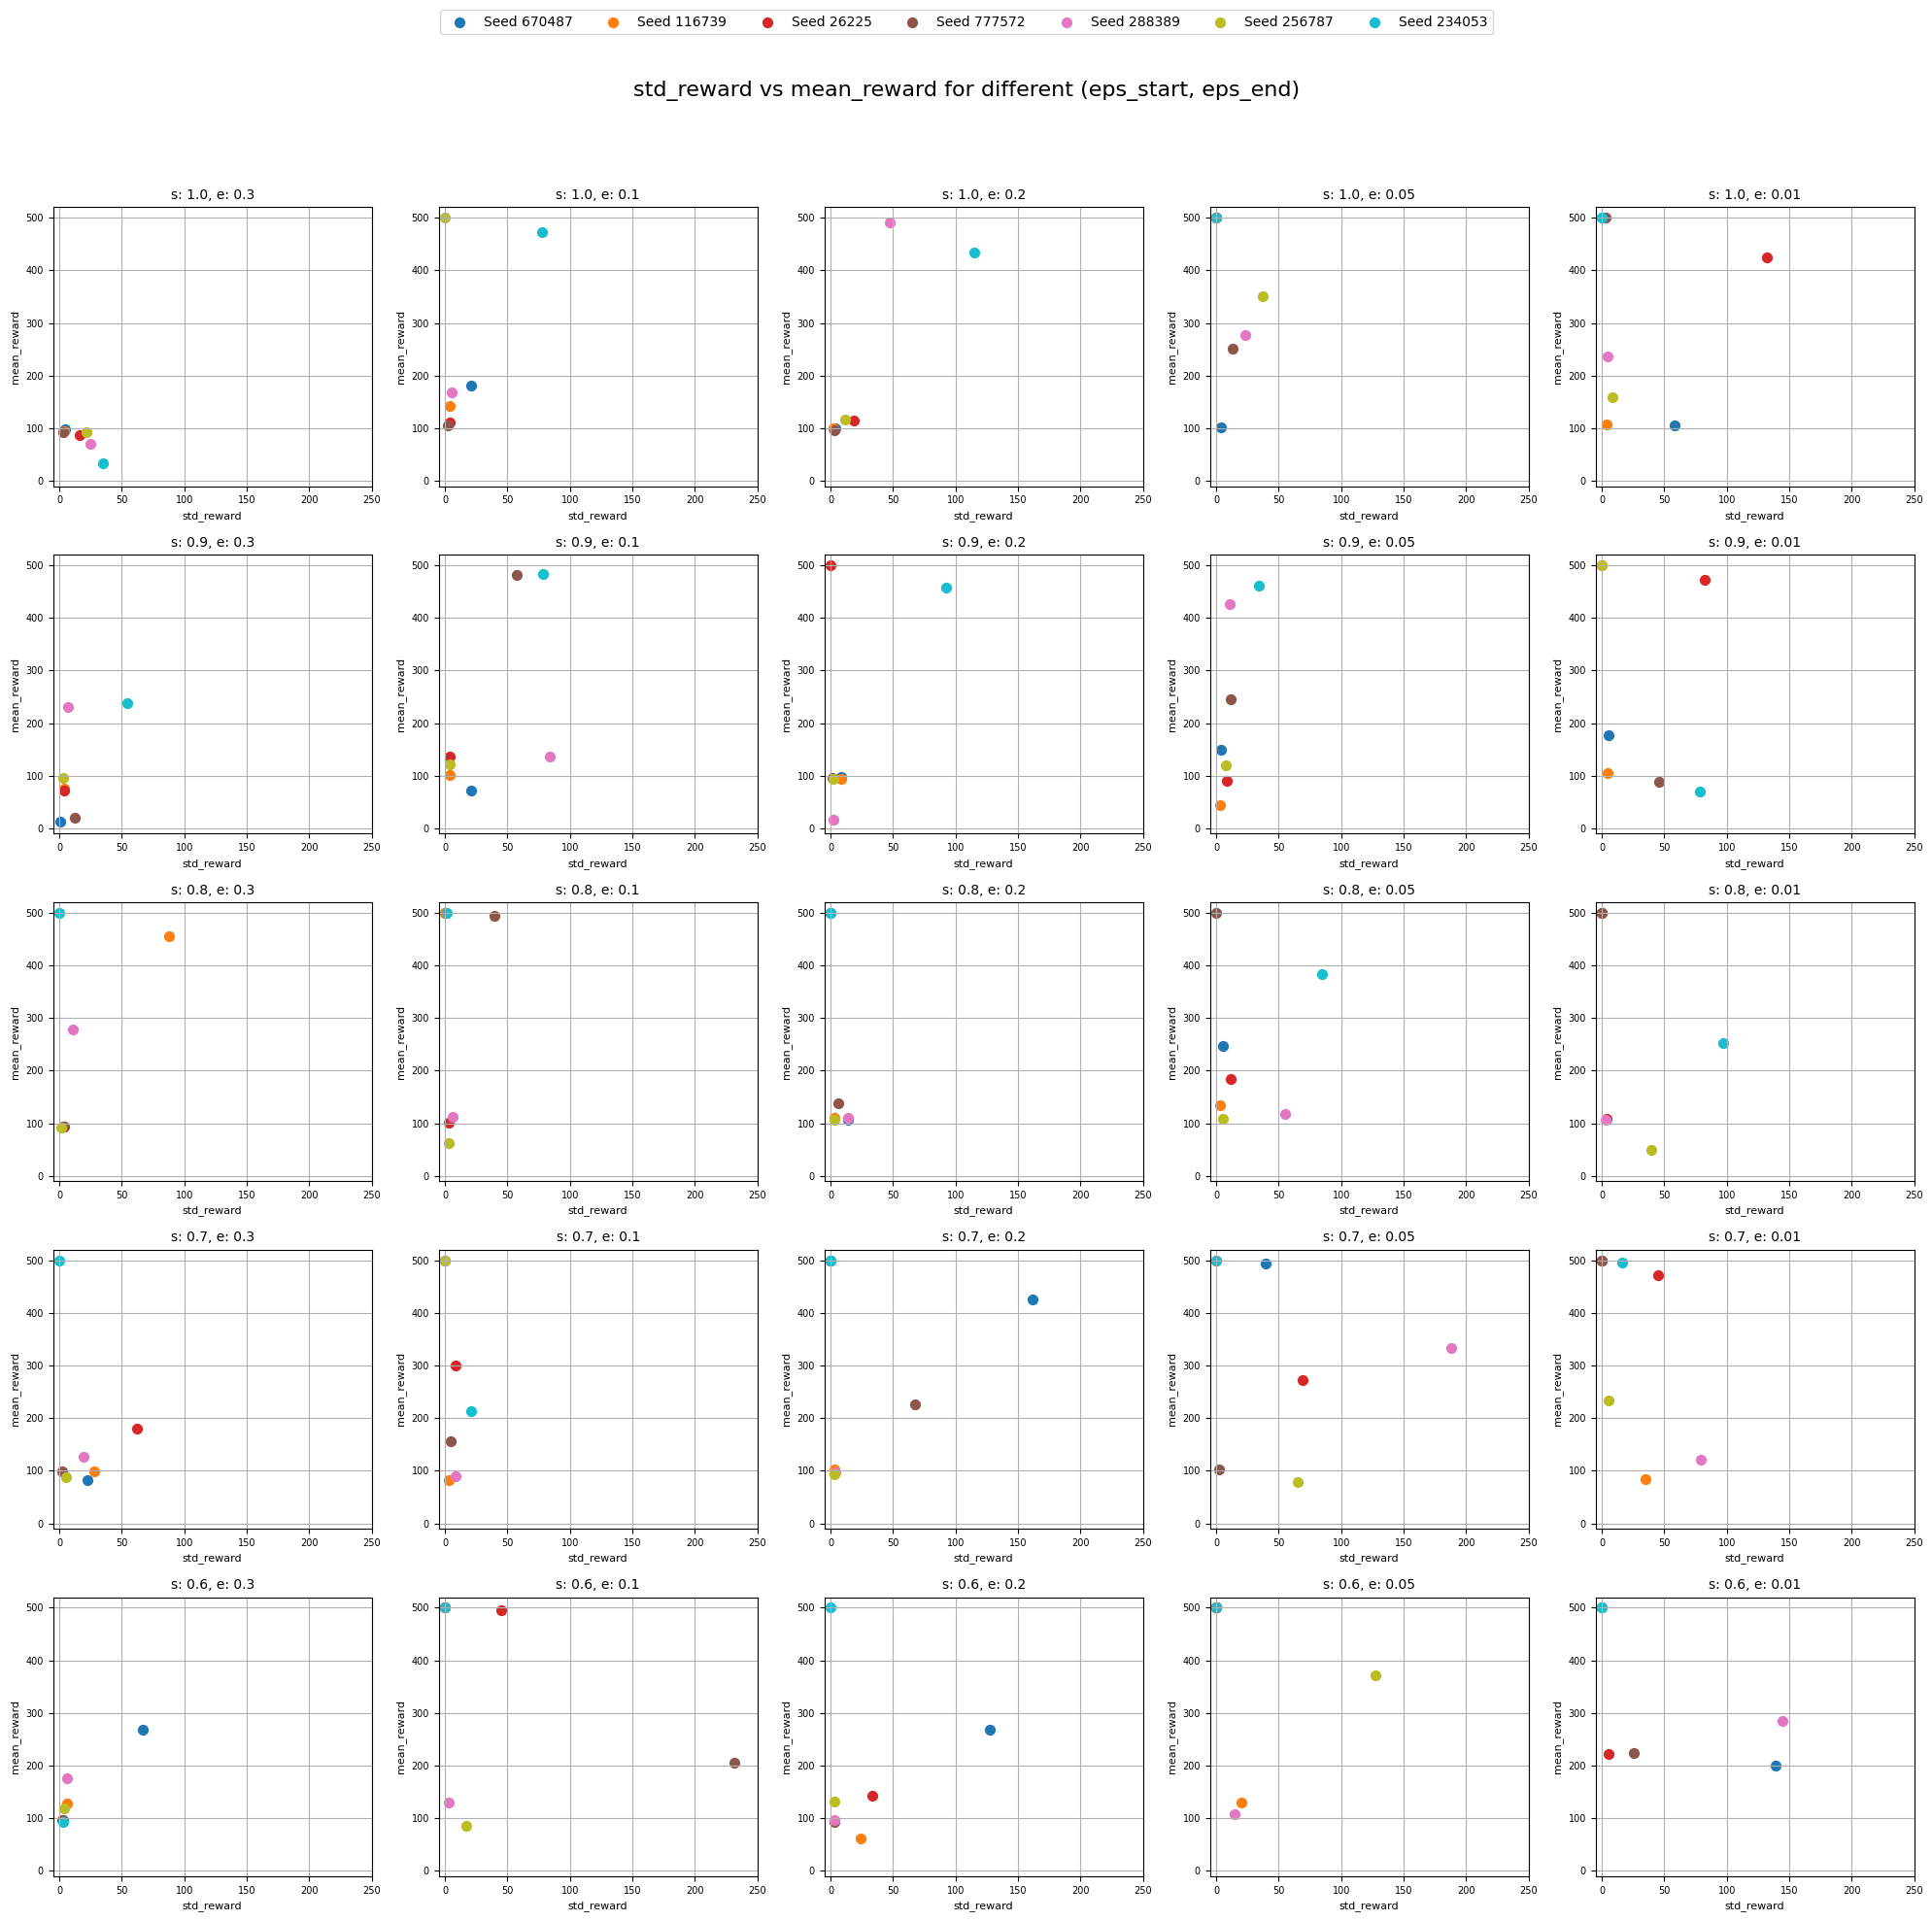

In [101]:
from itertools import product

unique_combinations = list(product(df['eps_start'].unique(), df['eps_end'].unique()))
unique_seeds = df['seed'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_seeds))  # Color map for seeds

# Create 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle('std_reward vs mean_reward for different (eps_start, eps_end)', fontsize=16)

for i, (eps_start, eps_end) in enumerate(unique_combinations):
    row, col = divmod(i, 5)
    ax = axes[row, col]
    subset = df[(df['eps_start'] == eps_start) & (df['eps_end'] == eps_end)]

    for j, seed in enumerate(unique_seeds):
        seed_data = subset[subset['seed'] == seed]

        label = f'Seed {seed}' if i == 0 else None
        ax.scatter(seed_data['std_reward'], seed_data['mean_reward'], 
                   color=colors(j), s=50, label=label)
    
    ax.set_title(f's: {eps_start}, e: {eps_end}', fontsize=10)
    ax.set_xlabel('std_reward', fontsize=8)
    ax.set_ylabel('mean_reward', fontsize=8)
    ax.tick_params(axis='both', labelsize=7)
    ax.grid(True)
    ax.set_xlim(-5, 250)
    ax.set_ylim(-10, 520)

fig.legend([f'Seed {s}' for s in unique_seeds],
           loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=7, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Overall plot

- Circle radius proportional to mean.
- Circle color proportional to variance (blue to red increasing).
- x axis : eps start and y axis : eps end 
- Considering **median** for robustness to outliers

In [102]:
grouped_df = df.groupby(['eps_start', 'eps_end']).agg({
    'mean_reward': 'median',
    'std_reward': 'median'
}).reset_index()

grouped_df.columns = ['eps_start', 'eps_end', 'median_mean_reward', 'median_std_reward']

grouped_df = grouped_df.round({'median_mean_reward': 2, 'median_std_reward': 2})

print(grouped_df)

    eps_start  eps_end  median_mean_reward  median_std_reward
0         0.6     0.01              285.76               5.25
1         0.6     0.05              500.00               0.00
2         0.6     0.10              495.49               3.37
3         0.6     0.20              131.52               3.38
4         0.6     0.30              118.53               3.51
5         0.7     0.01              470.65              16.25
6         0.7     0.05              333.38              39.42
7         0.7     0.10              212.57               4.41
8         0.7     0.20              226.01               2.80
9         0.7     0.30               99.12              19.71
10        0.8     0.01              251.70               2.64
11        0.8     0.05              183.75               5.68
12        0.8     0.10              494.42               3.37
13        0.8     0.20              109.96               3.37
14        0.8     0.30               93.84               3.36
15      

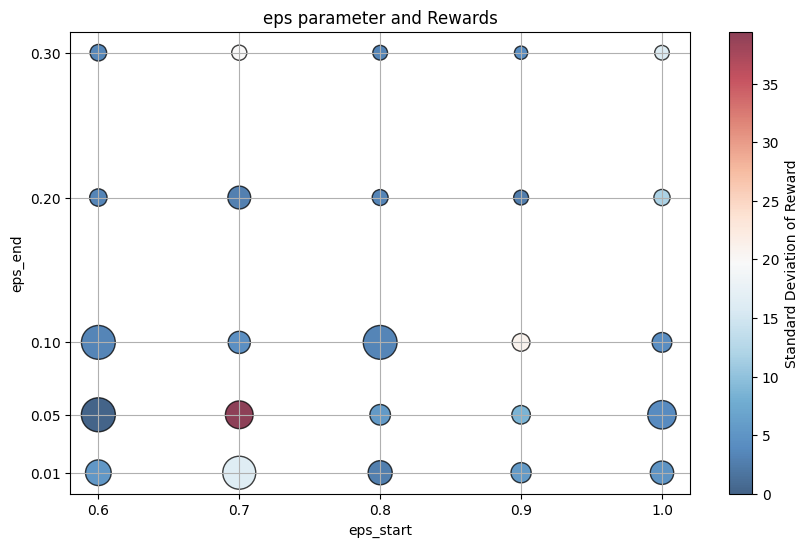

In [103]:
size_scale = 600 / grouped_df['median_mean_reward'].max()  # Scaling

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    grouped_df['eps_start'],
    grouped_df['eps_end'],
    s=grouped_df['median_mean_reward'] * size_scale,
    c=grouped_df['median_std_reward'],
    cmap='RdBu_r',
    vmin=grouped_df['median_std_reward'].min(),  # Force scale range
    vmax=grouped_df['median_std_reward'].max(),
    alpha=0.75,
    edgecolors='k'
)

eps_start_list = [1, 0.9, 0.8, 0.7, 0.6]
eps_end_list = [0.01, 0.05, 0.1, 0.2, 0.3]

plt.xticks(eps_start_list)
plt.yticks(eps_end_list)

plt.xlabel("eps_start")
plt.ylabel("eps_end")
plt.title("eps parameter and Rewards")

cbar = plt.colorbar(scatter)
cbar.set_label("Standard Deviation of Reward")

plt.grid(True)
plt.show()

## Additional analysis

### 25 amd 75th percentile performance - worse and best performance across seeds


    eps_start  eps_end      p25      p75       combo
0         0.6     0.01  223.445  500.000  0.6 → 0.01
1         0.6     0.05  251.250  500.000  0.6 → 0.05
2         0.6     0.10  167.545  500.000   0.6 → 0.1
3         0.6     0.20   94.930  205.700   0.6 → 0.2
4         0.6     0.30   97.135  152.625   0.6 → 0.3
5         0.7     0.01  177.020  498.050  0.7 → 0.01
6         0.7     0.05  186.835  496.535  0.7 → 0.05
7         0.7     0.10  122.735  399.680   0.7 → 0.1
8         0.7     0.20  100.325  462.730   0.7 → 0.2
9         0.7     0.30   92.960  153.550   0.7 → 0.3
10        0.8     0.01  107.740  500.000  0.8 → 0.01
11        0.8     0.05  126.000  315.330  0.8 → 0.05
12        0.8     0.10  106.930  499.920   0.8 → 0.1
13        0.8     0.20  108.460  318.985   0.8 → 0.2
14        0.8     0.30   93.825  366.555   0.8 → 0.3
15        0.9     0.01   97.160  486.350  0.9 → 0.01
16        0.9     0.05  104.975  334.980  0.9 → 0.05
17        0.9     0.10  111.320  309.095   0.9

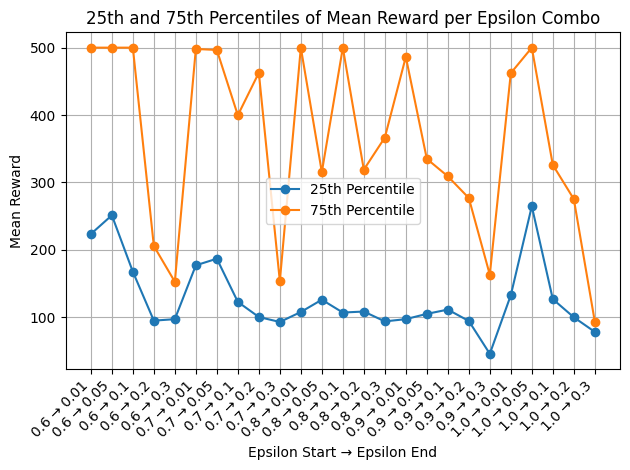

In [104]:
percentiles_reward = df.groupby(['eps_start', 'eps_end'])['mean_reward'].agg(
    p25=lambda x: np.percentile(x, 25),
    p75=lambda x: np.percentile(x, 75)
).reset_index()

# Create a combined label for each epsilon combo
percentiles_reward['combo'] = (
    percentiles_reward['eps_start'].astype(str) + ' → ' + 
    percentiles_reward['eps_end'].astype(str)
)

print(percentiles_reward)

# Plot the 25th and 75th percentiles
plt.figure()
plt.plot(percentiles_reward['combo'], percentiles_reward['p25'], marker='o', label='25th Percentile')
plt.plot(percentiles_reward['combo'], percentiles_reward['p75'], marker='o', label='75th Percentile')
plt.xlabel('Epsilon Start → Epsilon End')
plt.ylabel('Mean Reward')
plt.title('25th and 75th Percentiles of Mean Reward per Epsilon Combo')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


    eps_start  eps_end    p25     p75       combo
0         0.6     0.01  0.000  82.300  0.6 → 0.01
1         0.6     0.05  0.000  17.435  0.6 → 0.05
2         0.6     0.10  0.000  30.795   0.6 → 0.1
3         0.6     0.20  3.080  28.510   0.6 → 0.2
4         0.6     0.30  3.005   5.840   0.6 → 0.3
5         0.7     0.01  2.680  40.025  0.7 → 0.01
6         0.7     0.05  1.280  67.450  0.7 → 0.05
7         0.7     0.10  1.425   8.345   0.7 → 0.1
8         0.7     0.20  1.320  35.625   0.7 → 0.2
9         0.7     0.30  4.005  25.165   0.7 → 0.3
10        0.8     0.01  0.000  21.440  0.8 → 0.01
11        0.8     0.05  4.170  33.360  0.8 → 0.05
12        0.8     0.10  0.795   4.565   0.8 → 0.1
13        0.8     0.20  1.570   9.915   0.8 → 0.2
14        0.8     0.30  2.185   7.165   0.8 → 0.3
15        0.9     0.01  2.175  62.040  0.9 → 0.01
16        0.9     0.05  5.770  10.975  0.9 → 0.05
17        0.9     0.10  3.600  67.845   0.9 → 0.1
18        0.9     0.20  2.095   8.630   0.9 → 0.2


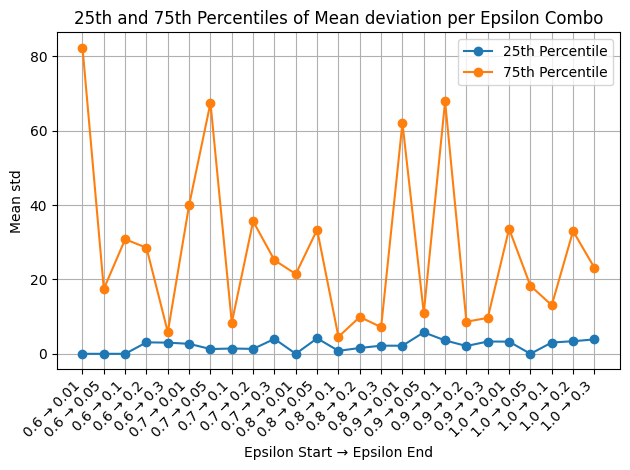

In [105]:
percentiles_std = df.groupby(['eps_start', 'eps_end'])['std_reward'] \
    .agg(p25=lambda x: np.percentile(x, 25),
         p75=lambda x: np.percentile(x, 75)) \
    .reset_index()

percentiles_std['combo'] = (
    percentiles_std['eps_start'].astype(str) + ' → ' + 
    percentiles_std['eps_end'].astype(str)
)

print(percentiles_std)

# Plot the 25th and 75th percentiles
plt.figure()
plt.plot(percentiles_std['combo'], percentiles_std['p25'], marker='o', label='25th Percentile')
plt.plot(percentiles_std['combo'], percentiles_std['p75'], marker='o', label='75th Percentile')
plt.xlabel('Epsilon Start → Epsilon End')
plt.ylabel('Mean std')
plt.title('25th and 75th Percentiles of Mean deviation per Epsilon Combo')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


## Conlcusion 

- epsilon start -> epsilon end : 1.0 -> 0.05 has the good balance between high rewards (Q1 and Q3) and least std (Q1 and Q3)